In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import seaborn as sns
%matplotlib inline
import snowflake.connector

Connection to Snowflake

In [47]:
conn=snowflake.connector.connect(
    user='SANJU',
    password='Sanjeev123',
    account='yopizja-xz30808',
    database='SALES',
    schema='PUBLIC',
    warehouse='COMPUTE_WH',
)

In [48]:
cur=conn.cursor()

In [49]:
select_amazon_sales='select*from copy_sales'

In [50]:
cur.execute(select_amazon_sales)
copy_sales=cur.fetch_pandas_all()

In [51]:
#top 5 data
copy_sales.head(5)

REGION       COUNTRY   ITEM_TYPE SALES_CHANNEL  \
0  Australia and Oceania        Tuvalu   Baby Food       Offline   
1     Sub-Saharan Africa  Burkina Faso  Vegetables        Online   
2     Sub-Saharan Africa       Senegal      Cereal        Online   
3                   Asia    Kyrgyzstan  Vegetables        Online   
4     Sub-Saharan Africa    Cape Verde     Clothes       Offline   

  ORDER_PRIORITY  ORDER_DATE    ORDERID   SHIP_DATE  UNIT_SOLD  UNIT_PRICE  \
0  High_Priority  2010-05-28  669165933  2010-06-27       9925      255.28   
1  High_Priority  2012-07-17  871543967  2012-07-27       8082      154.06   
2  High_Priority  2014-04-18  616607081  2014-05-30       6593      205.70   
3  High_Priority  2011-06-24  814711606  2011-07-12        124      154.06   
4  High_Priority  2014-08-02  939825713  2014-08-19       4168      109.28   

   UNIT_COST  TOTAL_REVENUE  TOTAL_COST  TOTAL_PROFIT  
0     159.42     2533654.00  1582243.50     951410.50  
1      90.93     1245112.92   734896.26     510216.66  
2     117.11     1356180.10   772106.23     584073.87  
3      90.93       19103.44    11275.32       7828.12  
4      35.84      455479.04   149381.12     306097.92

In [52]:
sales_data=copy_sales #always take a copy of the dataset

In [53]:

sales_data.head(5)

REGION       COUNTRY   ITEM_TYPE SALES_CHANNEL  \
0  Australia and Oceania        Tuvalu   Baby Food       Offline   
1     Sub-Saharan Africa  Burkina Faso  Vegetables        Online   
2     Sub-Saharan Africa       Senegal      Cereal        Online   
3                   Asia    Kyrgyzstan  Vegetables        Online   
4     Sub-Saharan Africa    Cape Verde     Clothes       Offline   

  ORDER_PRIORITY  ORDER_DATE    ORDERID   SHIP_DATE  UNIT_SOLD  UNIT_PRICE  \
0  High_Priority  2010-05-28  669165933  2010-06-27       9925      255.28   
1  High_Priority  2012-07-17  871543967  2012-07-27       8082      154.06   
2  High_Priority  2014-04-18  616607081  2014-05-30       6593      205.70   
3  High_Priority  2011-06-24  814711606  2011-07-12        124      154.06   
4  High_Priority  2014-08-02  939825713  2014-08-19       4168      109.28   

   UNIT_COST  TOTAL_REVENUE  TOTAL_COST  TOTAL_PROFIT  
0     159.42     2533654.00  1582243.50     951410.50  
1      90.93     1245112.92   734896.26     510216.66  
2     117.11     1356180.10   772106.23     584073.87  
3      90.93       19103.44    11275.32       7828.12  
4      35.84      455479.04   149381.12     306097.92

In [54]:
#bottom 5 data
sales_data.tail(5)

REGION     COUNTRY      ITEM_TYPE SALES_CHANNEL  \
95  Sub-Saharan Africa      Zambia         Snacks        Online   
96  Sub-Saharan Africa       Kenya     Vegetables        Online   
97       North America      Mexico  Personal Care       Offline   
98                Asia    Malaysia         Fruits       Offline   
99  Sub-Saharan Africa  Mozambique      Household       Offline   

   ORDER_PRIORITY  ORDER_DATE    ORDERID   SHIP_DATE  UNIT_SOLD  UNIT_PRICE  \
95   Low_Priority  2011-01-04  122583663  2011-01-05       4085      152.58   
96   Low_Priority  2012-03-18  827844560  2012-04-07       6457      154.06   
97   Low_Priority  2012-02-17  430915820  2012-03-20       6422       81.73   
98   Low_Priority  2011-11-11  810711038  2011-12-28       6267        9.33   
99   Low_Priority  2012-02-10  665095412  2012-02-15       5367      668.27   

    UNIT_COST  TOTAL_REVENUE  TOTAL_COST  TOTAL_PROFIT  
95      97.44      623289.30   398042.40     225246.90  
96      90.93      994765.42   587135.01     407630.41  
97      56.67      524870.06   363934.74     160935.32  
98       6.92       58471.11    43367.64      15103.47  
99     502.54     3586605.09  2697132.18     889472.91

In [55]:
#to check any null value present in the dataset
sales_data.isnull().sum()

REGION            0
COUNTRY           0
ITEM_TYPE         0
SALES_CHANNEL     0
ORDER_PRIORITY    0
ORDER_DATE        0
ORDERID           0
SHIP_DATE         0
UNIT_SOLD         0
UNIT_PRICE        0
UNIT_COST         0
TOTAL_REVENUE     0
TOTAL_COST        0
TOTAL_PROFIT      0
dtype: int64

In [56]:
# to check all the columns present in the datset
sales_data.columns

Index(['REGION', 'COUNTRY', 'ITEM_TYPE', 'SALES_CHANNEL', 'ORDER_PRIORITY',
       'ORDER_DATE', 'ORDERID', 'SHIP_DATE', 'UNIT_SOLD', 'UNIT_PRICE',
       'UNIT_COST', 'TOTAL_REVENUE', 'TOTAL_COST', 'TOTAL_PROFIT'],
      dtype='object')

In [57]:
# to check the total number of columns and rows
sales_data.shape

(100, 14)

In [58]:
# to check the information of the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          100 non-null    object 
 1   COUNTRY         100 non-null    object 
 2   ITEM_TYPE       100 non-null    object 
 3   SALES_CHANNEL   100 non-null    object 
 4   ORDER_PRIORITY  100 non-null    object 
 5   ORDER_DATE      100 non-null    object 
 6   ORDERID         100 non-null    int32  
 7   SHIP_DATE       100 non-null    object 
 8   UNIT_SOLD       100 non-null    int16  
 9   UNIT_PRICE      100 non-null    float64
 10  UNIT_COST       100 non-null    float64
 11  TOTAL_REVENUE   100 non-null    float64
 12  TOTAL_COST      100 non-null    float64
 13  TOTAL_PROFIT    100 non-null    float64
dtypes: float64(5), int16(1), int32(1), object(7)
memory usage: 10.1+ KB


In [59]:
# Generating descriptive statistics
sales_data.describe()

ORDERID    UNIT_SOLD  UNIT_PRICE   UNIT_COST  TOTAL_REVENUE  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         TOTAL_COST  TOTAL_PROFIT  
count  1.000000e+02  1.000000e+02  
mean   9.318057e+05  4.416820e+05  
std    1.083938e+06  4.385379e+05  
min    3.612240e+03  1.258020e+03  
25%    1.688680e+05  1.214436e+05  
50%    3.635664e+05  2.907680e+05  
75%    1.613870e+06  6.358288e+05  
max    4.509794e+06  1.719922e+06

In [60]:
sales_data.head()

REGION       COUNTRY   ITEM_TYPE SALES_CHANNEL  \
0  Australia and Oceania        Tuvalu   Baby Food       Offline   
1     Sub-Saharan Africa  Burkina Faso  Vegetables        Online   
2     Sub-Saharan Africa       Senegal      Cereal        Online   
3                   Asia    Kyrgyzstan  Vegetables        Online   
4     Sub-Saharan Africa    Cape Verde     Clothes       Offline   

  ORDER_PRIORITY  ORDER_DATE    ORDERID   SHIP_DATE  UNIT_SOLD  UNIT_PRICE  \
0  High_Priority  2010-05-28  669165933  2010-06-27       9925      255.28   
1  High_Priority  2012-07-17  871543967  2012-07-27       8082      154.06   
2  High_Priority  2014-04-18  616607081  2014-05-30       6593      205.70   
3  High_Priority  2011-06-24  814711606  2011-07-12        124      154.06   
4  High_Priority  2014-08-02  939825713  2014-08-19       4168      109.28   

   UNIT_COST  TOTAL_REVENUE  TOTAL_COST  TOTAL_PROFIT  
0     159.42     2533654.00  1582243.50     951410.50  
1      90.93     1245112.92   734896.26     510216.66  
2     117.11     1356180.10   772106.23     584073.87  
3      90.93       19103.44    11275.32       7828.12  
4      35.84      455479.04   149381.12     306097.92

In [75]:
# Converting the order_date and ship_date to date data type

In [71]:
sales_data['ORDER_DATE']=pd.to_datetime(sales_data['ORDER_DATE'])

In [73]:
sales_data['SHIP_DATE']=pd.to_datetime(sales_data['SHIP_DATE'])

In [74]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          100 non-null    object        
 1   COUNTRY         100 non-null    object        
 2   ITEM_TYPE       100 non-null    object        
 3   SALES_CHANNEL   100 non-null    object        
 4   ORDER_PRIORITY  100 non-null    object        
 5   ORDER_DATE      100 non-null    datetime64[ns]
 6   ORDERID         100 non-null    int32         
 7   SHIP_DATE       100 non-null    datetime64[ns]
 8   UNIT_SOLD       100 non-null    int16         
 9   UNIT_PRICE      100 non-null    float64       
 10  UNIT_COST       100 non-null    float64       
 11  TOTAL_REVENUE   100 non-null    float64       
 12  TOTAL_COST      100 non-null    float64       
 13  TOTAL_PROFIT    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int16(1), int32(1), objec

In [ ]:
#creating year,month,quarter and day column in the sales data

In [ ]:
sales_data['ORDER_YEAR']=sales_data['ORDER_DATE'].dt.year
sales_data['ORDER_MONTH']=sales_data['ORDER_DATE'].dt.month
sales_data['ORDER_QUARTER']=sales_data['ORDER_DATE'].dt.quarter
sales_data['ORDER_DAY']=sales_data['ORDER_DATE'].dt.day

In [76]:
sales_data.head()

REGION       COUNTRY   ITEM_TYPE SALES_CHANNEL  \
0  Australia and Oceania        Tuvalu   Baby Food       Offline   
1     Sub-Saharan Africa  Burkina Faso  Vegetables        Online   
2     Sub-Saharan Africa       Senegal      Cereal        Online   
3                   Asia    Kyrgyzstan  Vegetables        Online   
4     Sub-Saharan Africa    Cape Verde     Clothes       Offline   

  ORDER_PRIORITY ORDER_DATE    ORDERID  SHIP_DATE  UNIT_SOLD  UNIT_PRICE  \
0  High_Priority 2010-05-28  669165933 2010-06-27       9925      255.28   
1  High_Priority 2012-07-17  871543967 2012-07-27       8082      154.06   
2  High_Priority 2014-04-18  616607081 2014-05-30       6593      205.70   
3  High_Priority 2011-06-24  814711606 2011-07-12        124      154.06   
4  High_Priority 2014-08-02  939825713 2014-08-19       4168      109.28   

   UNIT_COST  TOTAL_REVENUE  TOTAL_COST  TOTAL_PROFIT  ORDER_YEAR  \
0     159.42     2533654.00  1582243.50     951410.50        2010   
1      90.93     1245112.92   734896.26     510216.66        2012   
2     117.11     1356180.10   772106.23     584073.87        2014   
3      90.93       19103.44    11275.32       7828.12        2011   
4      35.84      455479.04   149381.12     306097.92        2014   

   ORDER_MONTH  ORDER_QUARTER  ORDER_DAY  
0            5              2         28  
1            7              3         17  
2            4              2         18  
3            6              2         24  
4            8              3          2

In [77]:
#checking the correlation

<AxesSubplot:>

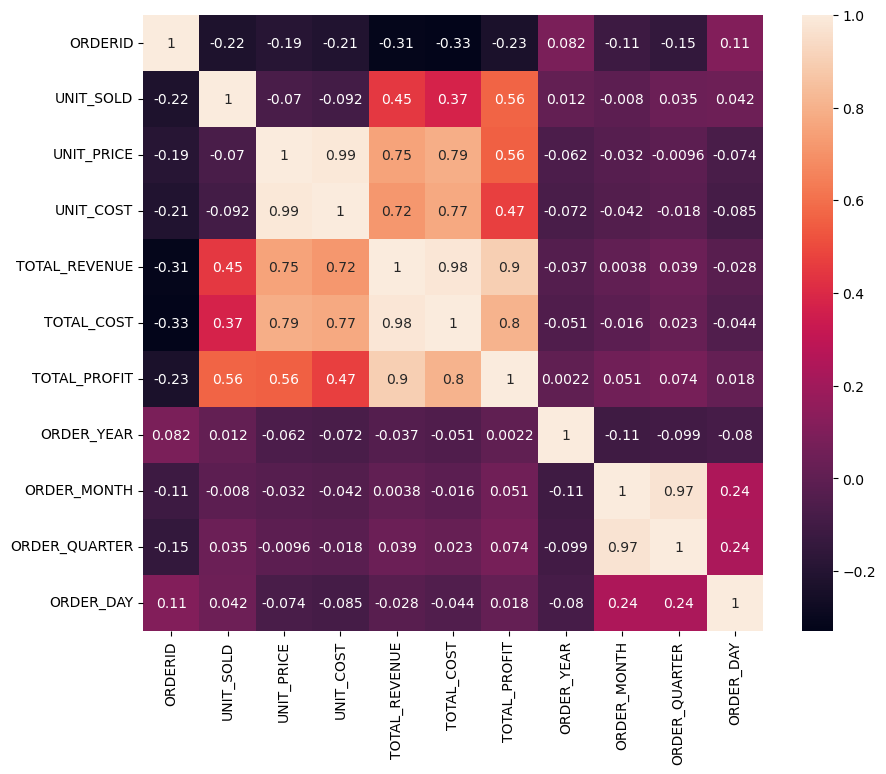

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(sales_data.corr(method='pearson'),annot=True)

In [84]:
sales_data.ITEM_TYPE.value_counts()

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: ITEM_TYPE, dtype: int64

Obervation:-
- Highest number of item sold is Clothes,Cosmetics

In [85]:
from pandas_profiling import ProfileReport

C:\Users\em\AppData\Local\Temp\ipykernel_9772\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [86]:
from pandas_profiling.profile_report import ProfileReport

In [87]:
profile=ProfileReport(sales_data,explorative=True,dark_mode=True)

In [88]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
pip install dtale

     ---------------------------------------- 14.2/14.2 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 642.7/642.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 10.4/10.4 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 62.3/62.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 65.9/65.9 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 219.7/219.7 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 383.4/383.4 kB 3.0 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=11dd89cdc91bb39a230642ccd80387097de51c3b3db9ed39860

In [91]:
import dtale
dtale.show(sales_data)

# Yearly Sales Record

In [94]:
Yearly_Sales=sales_data[['REGION','COUNTRY','ITEM_TYPE','SALES_CHANNEL','ORDER_PRIORITY','ORDER_DATE','ORDERID',
                        'SHIP_DATE','UNIT_SOLD','UNIT_PRICE','UNIT_COST','TOTAL_REVENUE','TOTAL_COST','TOTAL_PROFIT','ORDER_YEAR']]


ORDER_YEAR  TOTAL_REVENUE
0        2010    19186024.92
1        2011    11129166.07
2        2012    31898644.52
3        2013    20330448.66
4        2014    16630214.43
5        2015    12427982.86
6        2016    12372867.22
7        2017    13373419.63

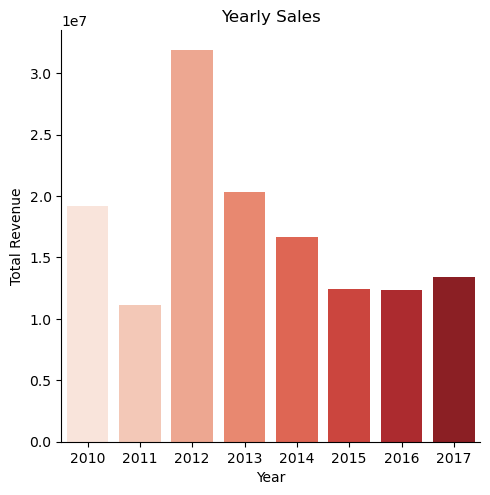

In [99]:
Yearly_Sales1=Yearly_Sales.groupby('ORDER_YEAR').sum().reset_index()
sns.catplot(y='TOTAL_REVENUE',x='ORDER_YEAR',data=Yearly_Sales1,palette='Reds',kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Sales')
Yearly_Sales1[['ORDER_YEAR','TOTAL_REVENUE']]

Obervation
- we can see that in the year 2012 we achive the maximum Revenue

<AxesSubplot:xlabel='ORDER_MONTH', ylabel='TOTAL_REVENUE'>

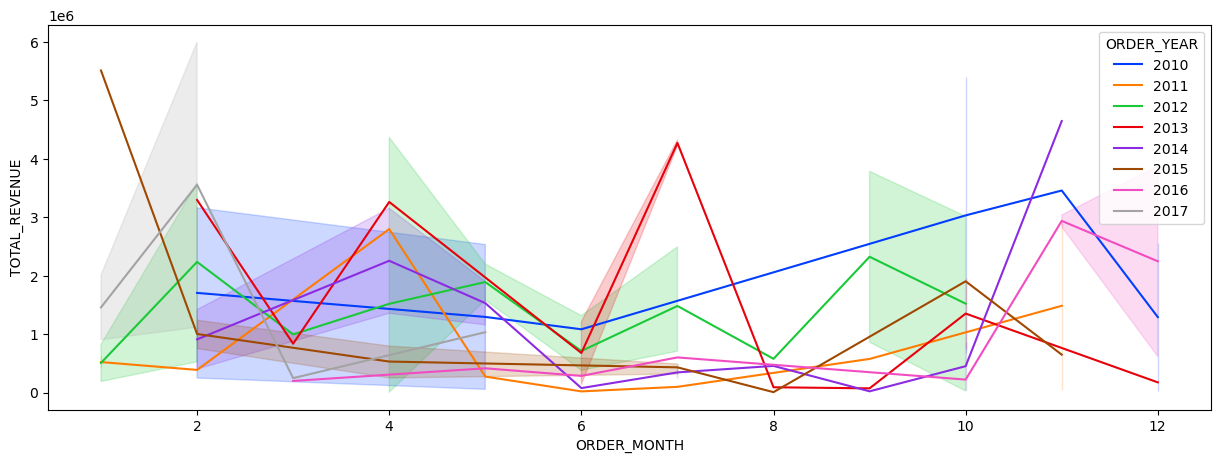

2023-08-12 20:43:38,225 - INFO     - Executing shutdown due to inactivity...
2023-08-12 20:43:42,345 - INFO     - Executing shutdown...
C:\Users\em\anaconda3\lib\site-packages\dtale\app.py:427: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [100]:
plt.figure(figsize=(15,5))
sns.lineplot(y='TOTAL_REVENUE',x='ORDER_MONTH',
            data=sales_data.groupby(['ORDER_DATE','ORDER_YEAR','ORDER_MONTH']).sum(),
            hue='ORDER_YEAR',palette='bright')

Obervation:-
 -   we can easily see that in 2010 our sales is incresing rapidly
     and after 2014 our sales is decreasing

In [111]:
#ploting pie char to show the sales in the years
yearly_revenue = Yearly_Sales1.groupby('ORDER_YEAR')['TOTAL_REVENUE'].sum()

In [112]:
yearly_revenue

ORDER_YEAR
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: TOTAL_REVENUE, dtype: float64

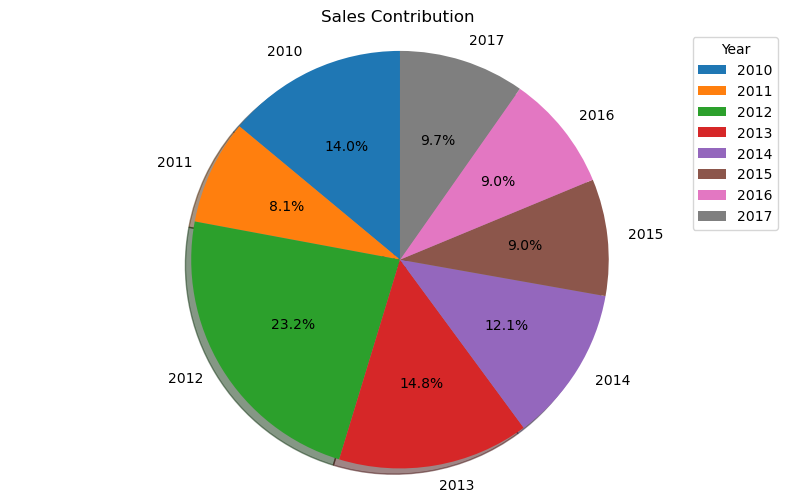

In [113]:
# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(yearly_revenue, labels=yearly_revenue.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Sales Contribution')
plt.legend(yearly_revenue.index, title='Year', loc='upper right')
plt.show()

# Observation:-
- 2012 Highest Sales then 2013>2010>2014

In [114]:
sales_data.head()

REGION       COUNTRY   ITEM_TYPE SALES_CHANNEL  \
0  Australia and Oceania        Tuvalu   Baby Food       Offline   
1     Sub-Saharan Africa  Burkina Faso  Vegetables        Online   
2     Sub-Saharan Africa       Senegal      Cereal        Online   
3                   Asia    Kyrgyzstan  Vegetables        Online   
4     Sub-Saharan Africa    Cape Verde     Clothes       Offline   

  ORDER_PRIORITY ORDER_DATE    ORDERID  SHIP_DATE  UNIT_SOLD  UNIT_PRICE  \
0  High_Priority 2010-05-28  669165933 2010-06-27       9925      255.28   
1  High_Priority 2012-07-17  871543967 2012-07-27       8082      154.06   
2  High_Priority 2014-04-18  616607081 2014-05-30       6593      205.70   
3  High_Priority 2011-06-24  814711606 2011-07-12        124      154.06   
4  High_Priority 2014-08-02  939825713 2014-08-19       4168      109.28   

   UNIT_COST  TOTAL_REVENUE  TOTAL_COST  TOTAL_PROFIT  ORDER_YEAR  \
0     159.42     2533654.00  1582243.50     951410.50        2010   
1      90.93     1245112.92   734896.26     510216.66        2012   
2     117.11     1356180.10   772106.23     584073.87        2014   
3      90.93       19103.44    11275.32       7828.12        2011   
4      35.84      455479.04   149381.12     306097.92        2014   

   ORDER_MONTH  ORDER_QUARTER  ORDER_DAY  
0            5              2         28  
1            7              3         17  
2            4              2         18  
3            6              2         24  
4            8              3          2

Text(0, 0.5, 'Count')

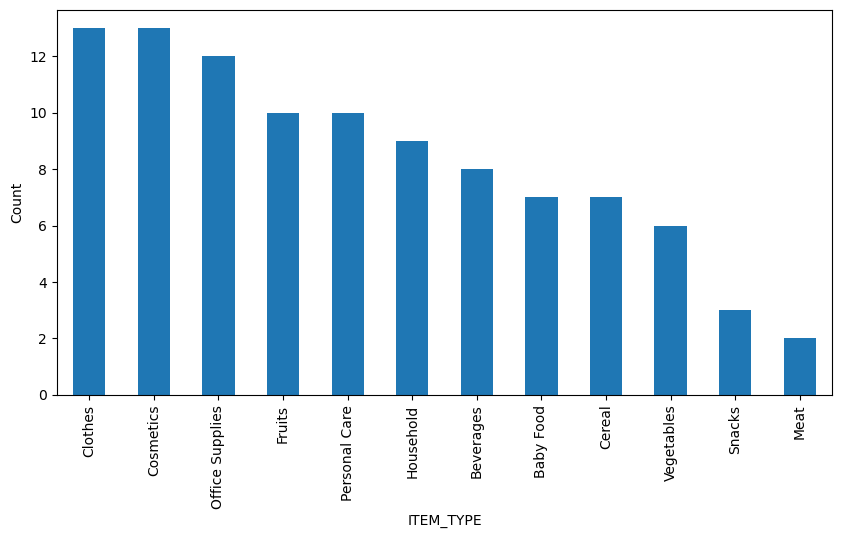

In [116]:
plt.figure(figsize=(10,5))
sales_data['ITEM_TYPE'].value_counts().plot.bar()
plt.xlabel('ITEM_TYPE')
plt.ylabel('Count')

Obervation:-
- We can see that Clothes and Cosmetics has sold maximum number of times

# Yearly MonthWise Record

In [117]:
Yearly_monthwise_sales=sales_data.groupby(['ORDER_YEAR','ORDER_MONTH']).sum().reset_index()
Yearly_monthwise_sales.iloc[:,6:].describe()

TOTAL_REVENUE    TOTAL_COST  TOTAL_PROFIT  ORDER_QUARTER  ORDER_DAY
count   6.000000e+01  6.000000e+01  6.000000e+01      60.000000  60.000000
mean    2.289146e+06  1.553009e+06  7.361366e+05       4.116667  27.500000
std     2.139470e+06  1.534718e+06  6.834586e+05       2.929058  15.609102
min     6.279090e+03  4.657160e+03  1.621930e+03       1.000000   1.000000
25%     5.400720e+05  2.475922e+05  2.139680e+05       2.000000  17.750000
50%     1.586264e+06  1.018850e+06  6.357950e+05       3.000000  25.000000
75%     3.422559e+06  2.563514e+06  1.094270e+06       6.000000  33.250000
max     8.545511e+06  5.223737e+06  3.398463e+06      16.000000  75.000000

**************************************************Yearly Monthwise Sales Trend**************************************************


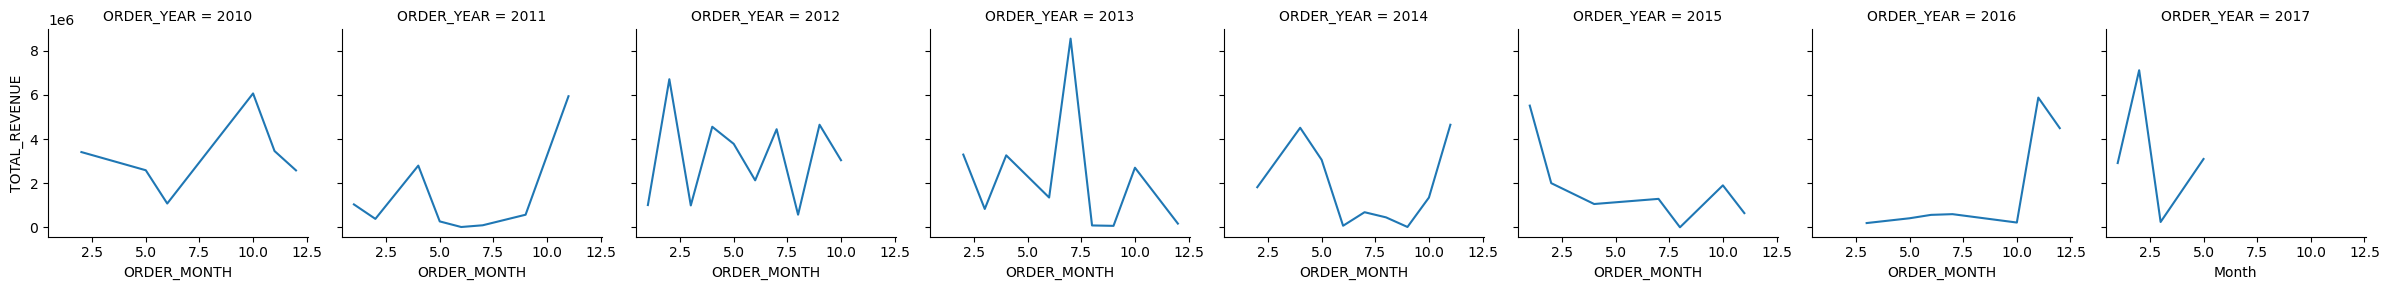

In [128]:
sns.relplot(x='ORDER_MONTH',y='TOTAL_REVENUE',data=Yearly_monthwise_sales,height=3,
           kind='line',aspect=1,col='ORDER_YEAR')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
print("*"*50+'Yearly Monthwise Sales Trend'+"*"*50)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='Count'>

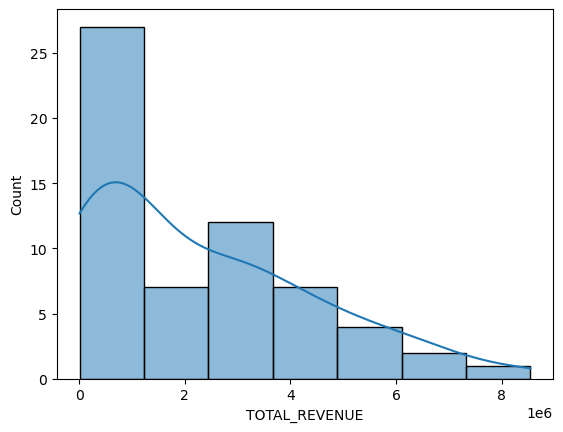

In [130]:
sns.histplot(Yearly_monthwise_sales["TOTAL_REVENUE"],kde=True)

# Monthly Record

In [131]:
Monthly_Sales=sales_data.groupby(['ORDER_YEAR','ORDER_MONTH','ORDER_DAY']).sum().reset_index()
Monthly_Sales.iloc[:,5:].describe()

UNIT_PRICE   UNIT_COST  TOTAL_REVENUE    TOTAL_COST  TOTAL_PROFIT  \
count  100.000000  100.000000   1.000000e+02  1.000000e+02  1.000000e+02   
mean   276.761300  191.048000   1.373488e+06  9.318057e+05  4.416820e+05   
std    235.592241  188.208181   1.460029e+06  1.083938e+06  4.385379e+05   
min      9.330000    6.920000   4.870260e+03  3.612240e+03  1.258020e+03   
25%     81.730000   35.840000   2.687212e+05  1.688680e+05  1.214436e+05   
50%    179.880000  107.275000   7.523144e+05  3.635664e+05  2.907680e+05   
75%    437.200000  263.330000   2.212045e+06  1.613870e+06  6.358288e+05   
max    668.270000  524.960000   5.997055e+06  4.509794e+06  1.719922e+06   

       ORDER_QUARTER  
count     100.000000  
mean        2.470000  
std         1.114233  
min         1.000000  
25%         2.000000  
50%         2.000000  
75%         3.250000  
max         4.000000

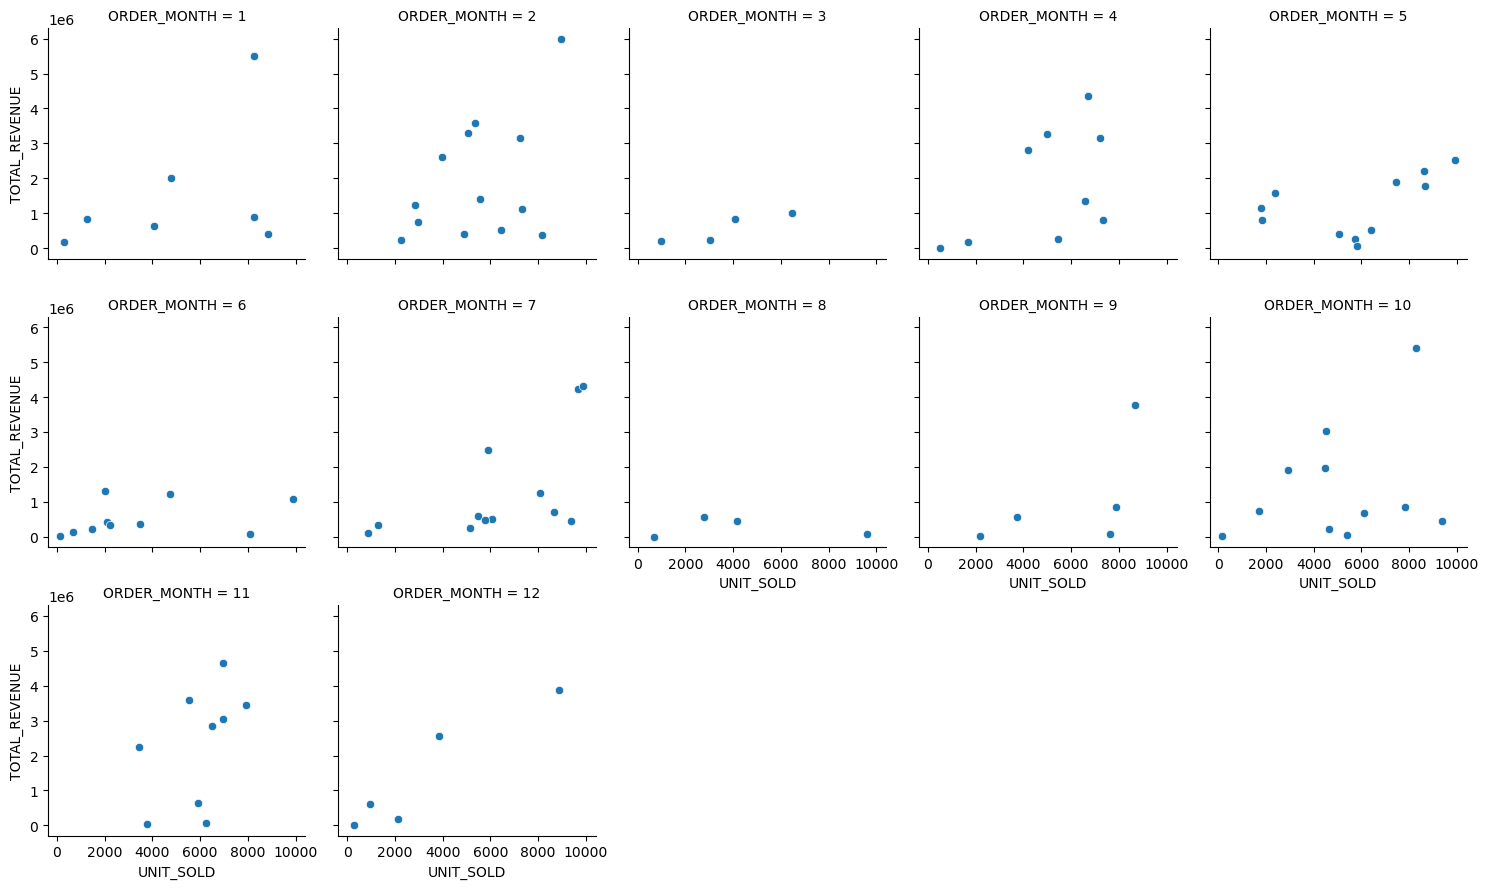

In [132]:
sns.relplot(y='TOTAL_REVENUE',x='UNIT_SOLD',data=sales_data,height=3,aspect=1,
           col='ORDER_MONTH',col_wrap=5,palette='muted')

**************************************************Monthly Sales Trend in 2012**************************************************


<Figure size 800x1000 with 0 Axes>

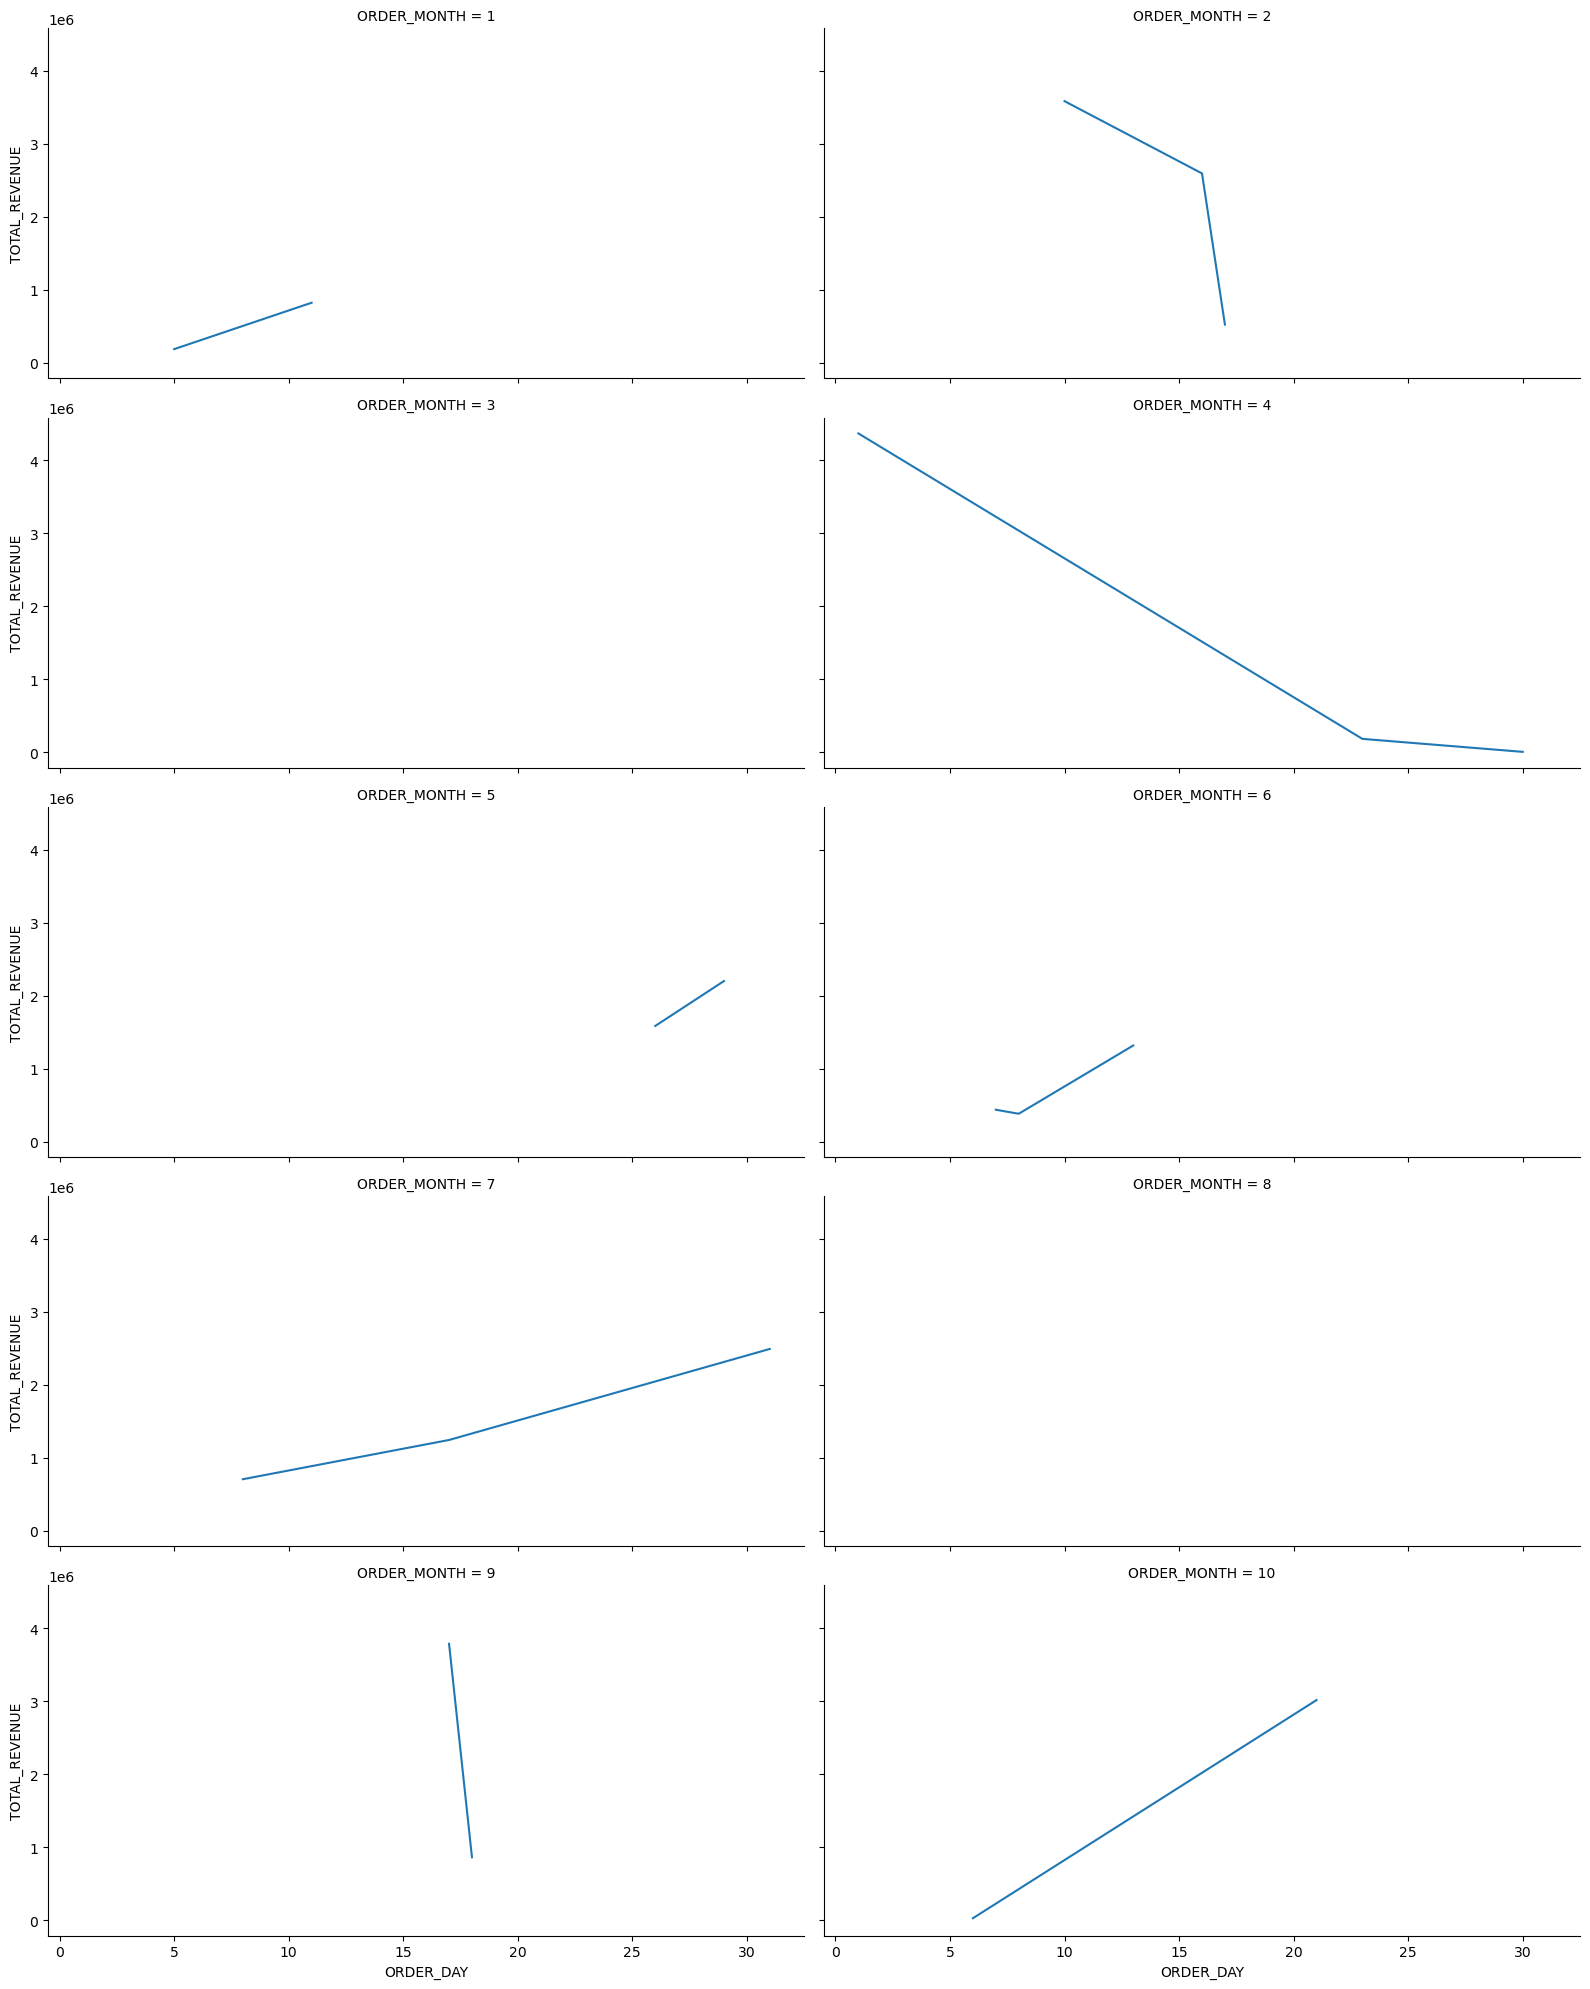

In [148]:
plt.figure(figsize=(8,10))
sns.relplot(x='ORDER_DAY',y='TOTAL_REVENUE',data=sales_data.query('ORDER_YEAR==2012'),
           kind='line',col='ORDER_MONTH',col_wrap=2,height=4,aspect=2)
plt.ylabel("Sales Amount")
print('*'*50+'Monthly Sales Trend in 2012'+'*'*50)

# Profit Records:-

ORDER_YEAR  TOTAL_PROFIT
0         2010     951410.50
1         2012     510216.66
2         2014     584073.87
3         2011       7828.12
4         2014     306097.92
..         ...           ...
95        2011     225246.90
96        2012     407630.41
97        2012     160935.32
98        2011      15103.47
99        2012     889472.91

[100 rows x 2 columns]

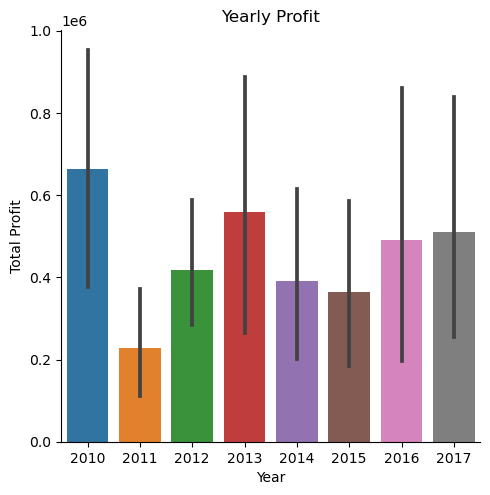

In [149]:
sns.catplot(y='TOTAL_PROFIT',x='ORDER_YEAR',data=sales_data,kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Yearly Profit')
sales_data[['ORDER_YEAR','TOTAL_PROFIT']]

Observation:
- In the year 2010 we have achived the maximum Profit

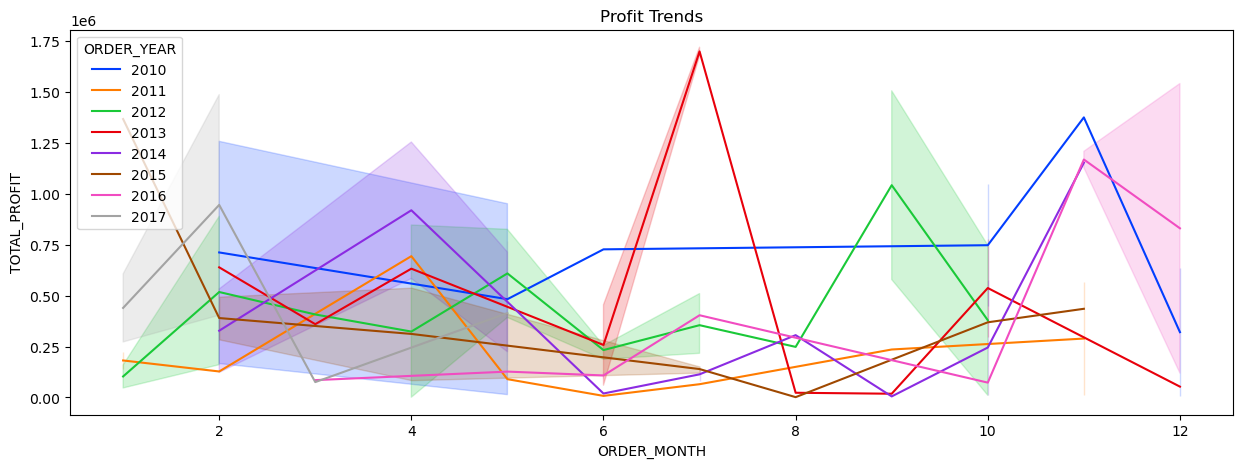

In [150]:
plt.figure(figsize=(15,5))
sns.lineplot(y='TOTAL_PROFIT',x='ORDER_MONTH',
            data=sales_data.groupby(['ORDER_DATE','ORDER_YEAR','ORDER_MONTH']).sum(),
            hue='ORDER_YEAR',palette='bright')
plt.title('Profit Trends')
plt.show()

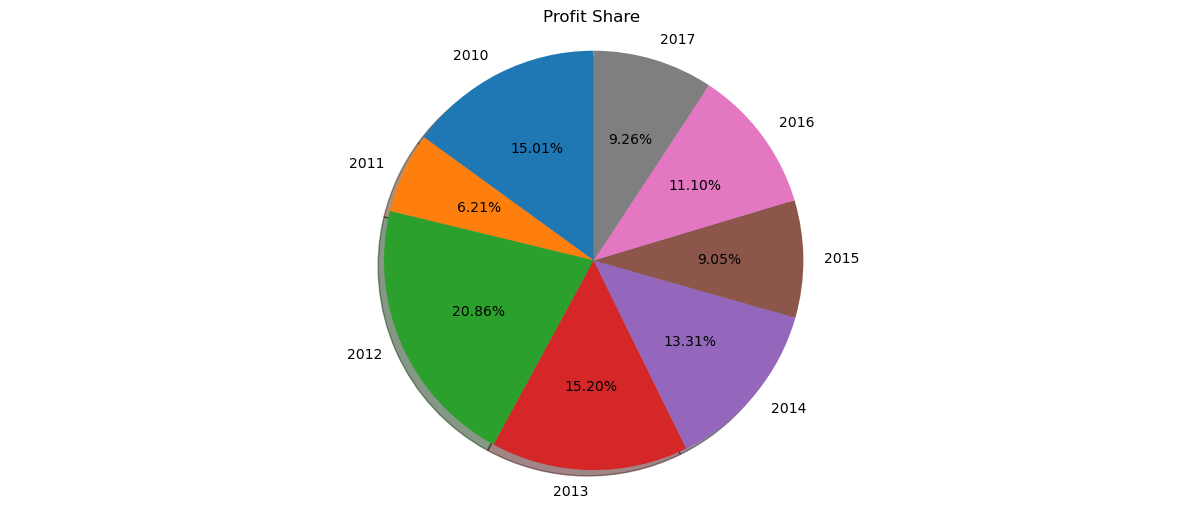

In [153]:
plt.figure(figsize=(15,6))
plt.pie('TOTAL_PROFIT',labels='ORDER_YEAR',data=Yearly_Sales1[['ORDER_YEAR','TOTAL_PROFIT']],
       autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Profit Share')
plt.show()

TOTAL_PROFIT SALES_CHANNEL
0      951410.50       Offline
1      510216.66        Online
2      584073.87        Online
3        7828.12        Online
4      306097.92       Offline
..           ...           ...
95     225246.90        Online
96     407630.41        Online
97     160935.32       Offline
98      15103.47       Offline
99     889472.91       Offline

[100 rows x 2 columns]

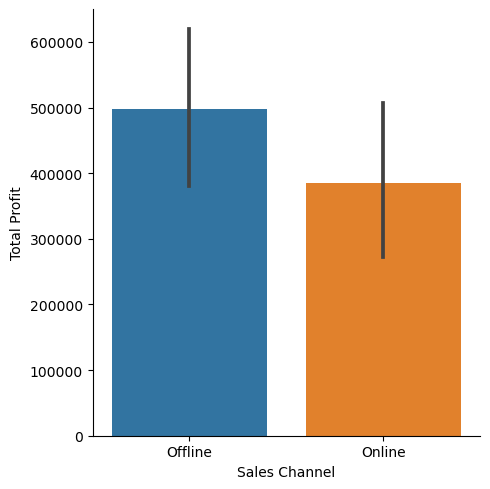

In [157]:
sns.catplot(y='TOTAL_PROFIT',x='SALES_CHANNEL',data=sales_data,kind='bar')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
sales_data[['TOTAL_PROFIT','SALES_CHANNEL']]

# Observation:-
    - Ofline Products are more sale in Compared to Online

# Now Loading the table to Database

In [171]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snoeCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass


In [172]:
conn=snowflake.connector.connect(
     user='SANJU',
     password=getpass.getpass('your snowflake password'),
     account='yopizja-xz30808',
     database='SALES',
     schema='PUBLIC',
     warehouse='COMPUTE_WH',
)

your snowflake password········


2023-08-14 12:39:06,938 - INFO     - Snowflake Connector for Python Version: 3.0.3, Python Version: 3.9.13, Platform: Windows-10-10.0.19045-SP0
2023-08-14 12:39:06,940 - INFO     - This connection is in OCSP Fail Open Mode. TLS Certificates would be checked for validity and revocation status. Any other Certificate Revocation related exceptions or OCSP Responder failures would be disregarded in favor of connectivity.


In [174]:
cur=conn.cursor()

In [175]:
sales_data.head()

REGION       COUNTRY   ITEM_TYPE SALES_CHANNEL  \
0  Australia and Oceania        Tuvalu   Baby Food       Offline   
1     Sub-Saharan Africa  Burkina Faso  Vegetables        Online   
2     Sub-Saharan Africa       Senegal      Cereal        Online   
3                   Asia    Kyrgyzstan  Vegetables        Online   
4     Sub-Saharan Africa    Cape Verde     Clothes       Offline   

  ORDER_PRIORITY ORDER_DATE    ORDERID  SHIP_DATE  UNIT_SOLD  UNIT_PRICE  \
0  High_Priority 2010-05-28  669165933 2010-06-27       9925      255.28   
1  High_Priority 2012-07-17  871543967 2012-07-27       8082      154.06   
2  High_Priority 2014-04-18  616607081 2014-05-30       6593      205.70   
3  High_Priority 2011-06-24  814711606 2011-07-12        124      154.06   
4  High_Priority 2014-08-02  939825713 2014-08-19       4168      109.28   

   UNIT_COST  TOTAL_REVENUE  TOTAL_COST  TOTAL_PROFIT  ORDER_YEAR  \
0     159.42     2533654.00  1582243.50     951410.50        2010   
1      90.93     1245112.92   734896.26     510216.66        2012   
2     117.11     1356180.10   772106.23     584073.87        2014   
3      90.93       19103.44    11275.32       7828.12        2011   
4      35.84      455479.04   149381.12     306097.92        2014   

   ORDER_MONTH  ORDER_QUARTER  ORDER_DAY  
0            5              2         28  
1            7              3         17  
2            4              2         18  
3            6              2         24  
4            8              3          2

In [178]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          100 non-null    object        
 1   COUNTRY         100 non-null    object        
 2   ITEM_TYPE       100 non-null    object        
 3   SALES_CHANNEL   100 non-null    object        
 4   ORDER_PRIORITY  100 non-null    object        
 5   ORDER_DATE      100 non-null    datetime64[ns]
 6   ORDERID         100 non-null    int32         
 7   SHIP_DATE       100 non-null    datetime64[ns]
 8   UNIT_SOLD       100 non-null    int16         
 9   UNIT_PRICE      100 non-null    float64       
 10  UNIT_COST       100 non-null    float64       
 11  TOTAL_REVENUE   100 non-null    float64       
 12  TOTAL_COST      100 non-null    float64       
 13  TOTAL_PROFIT    100 non-null    float64       
 14  ORDER_YEAR      100 non-null    int64         
 15  ORDER_M

In [180]:
sales_data['ORDER_DATE']=sales_data['ORDER_DATE'].dt.strftime('%Y-%m-%d')

In [181]:
sales_data['SHIP_DATE']=sales_data['SHIP_DATE'].dt.strftime('%Y-%m-%d')

In [182]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          100 non-null    object 
 1   COUNTRY         100 non-null    object 
 2   ITEM_TYPE       100 non-null    object 
 3   SALES_CHANNEL   100 non-null    object 
 4   ORDER_PRIORITY  100 non-null    object 
 5   ORDER_DATE      100 non-null    object 
 6   ORDERID         100 non-null    int32  
 7   SHIP_DATE       100 non-null    object 
 8   UNIT_SOLD       100 non-null    int16  
 9   UNIT_PRICE      100 non-null    float64
 10  UNIT_COST       100 non-null    float64
 11  TOTAL_REVENUE   100 non-null    float64
 12  TOTAL_COST      100 non-null    float64
 13  TOTAL_PROFIT    100 non-null    float64
 14  ORDER_YEAR      100 non-null    int64  
 15  ORDER_MONTH     100 non-null    int64  
 16  ORDER_QUARTER   100 non-null    int64  
 17  ORDER_DAY       100 non-null    int6

In [183]:
cur.execute('''create or replace table Sales_new
(REGION VARCHAR(40),
COUNTRY VARCHAR(40),
ITEM_TYPE VARCHAR(40),
SALES_CHANNEL VARCHAR(40),
ORDER_PRIORITY VARCHAR(30),
ORDER_DATE DATE,
ORDERID INT,
SHIP_DATE DATE,
UNIT_SOLD INT,
UNIT_PRICE FLOAT,
UNIT_COST FLOAT,
TOTAL_REVENUE FLOAT,
TOTAL_COST FLOAT,
TOTAL_PROFIT FLOAT,
ORDER_YEAR INT,
ORDER_MONTH INT,
ORDER_QUARTER INT,
ORDER_DAY INT)''')

2023-08-14 12:47:53,963 - INFO     - query: [create or replace table Sales_new (REGION VARCHAR(40), COUNTRY VARCHAR(40), ITEM...]
2023-08-14 12:47:54,911 - INFO     - query execution done
2023-08-14 12:47:54,915 - INFO     - Number of results in first chunk: 1


In [184]:
success,nchunks,nrows,_=write_pandas(conn,sales_data,'Sales_new',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

2023-08-14 12:47:55,164 - INFO     - query: [CREATE TEMP STAGE /* Python:snowflake.connector.pandas_tools.write_pandas() */ q...]
2023-08-14 12:47:55,341 - INFO     - query execution done
2023-08-14 12:47:55,344 - INFO     - Number of results in first chunk: 1
2023-08-14 12:47:55,389 - INFO     - query: [PUT /* Python:snowflake.connector.pandas_tools.write_pandas() */ 'file://C:\\Use...]
2023-08-14 12:47:56,427 - INFO     - query execution done
2023-08-14 12:47:57,592 - INFO     - query: [COPY INTO Sales_new /* Python:snowflake.connector.pandas_tools.write_pandas() */...]
2023-08-14 12:47:58,651 - INFO     - query execution done
2023-08-14 12:47:58,654 - INFO     - Number of results in first chunk: 1


True,1,100


In [185]:
import os


In [186]:
os.getcwd()

'C:\\Users\\em'